<a href="https://colab.research.google.com/github/Aryabhatt-O/Mohanbugan/blob/main/Amartya_Roy_PL_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000000})'''))

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import requests
result = requests.get('http://www.gutenberg.org/files/1524/1524-0.txt')
str = result.text

from nltk.tokenize import word_tokenize # using NLTK(word_tokenize)
str_list = str.split() # splitted by space
unique_words = set(str_list) # to avoid duplicacy set()


def showTokens(str):# function for showing Tokens
  str_list = str.split() # splitted by space
  unique_words = set(str_list) # to avoid duplicacy set()
  print("Tokens",unique_words)
  
def showTokeNs(str):
  print("Tokens",set(word_tokenize(str))) # to avoid duplicacy set()


def showfreq(str):# function for showing occurence
  str_list = str.split()
  freq = {i:str_list.count(i) for i in str_list} # lambda and count()
  print('occurence of  words:',freq) 

def showpunc(str):#function to show punctuation
  import string # using standard library function
  for i in str:
    if i in string.punctuation:
      print("Punctuation:",i)

def showpunc1(str):#function to show punctuation without using library function
  Punctuation = []
  punctuation = '''!@#$%^&*(){}[]|._-`/?:;"'\,~''';
  for i in set(word_tokenize(str)):
    if i in punctuation:
      Punctuation.append(i)
  print("Punctuation:",Punctuation)

def shownumber(str):#function to show numberlist
  array =[]
  for i in set(word_tokenize(str)):
    if i.isdigit() == True:
      array.append(i)
      array1 = sorted(array)
  array1.sort(key=len)
  print("Numbers: ",array1)


def showalphanumeric(str):#function to show alphanumeric
  Alphanumeric = []
  for i in set(word_tokenize(str)) :
    if i.isalpha() == False and i.isnumeric() == False and i.isalnum() == True:
      Alphanumeric.append(i)
  print("Alphanumeric:",Alphanumeric)

def mtct_pl_lab(showTokens,showfreq,showpunc1,shownumber,showalphanumeric): # passing all functions as a parameter to the ultimate function
  return (showTokeNs(str),showfreq(str),showpunc1(str),shownumber(str),showalphanumeric(str))


if __name__ == "__main__":
  mtct_pl_lab(showTokens,showfreq,showpunc1,shownumber,showalphanumeric)

In [ ]:
from google.colab import files
uploaded = files.upload()

# Gourob's IBM

In [ ]:

import math
def computeArea(height,angleOfElevation):
  if height <= 1 or height >= 100:
    print("invalid input")
  else:
    x = math.radians(angleOfElevation)
    radii = height * math.tan(x)
    area = math.pi * (radii)**2
    print(math.floor(area))


height = int(input().strip())
angleOfElevation = int(input().strip())
(computeArea(height,angleOfElevation))

# Min_Dist_Required_Truck_Delv_Order(Gourob's Amazon Coding Round)
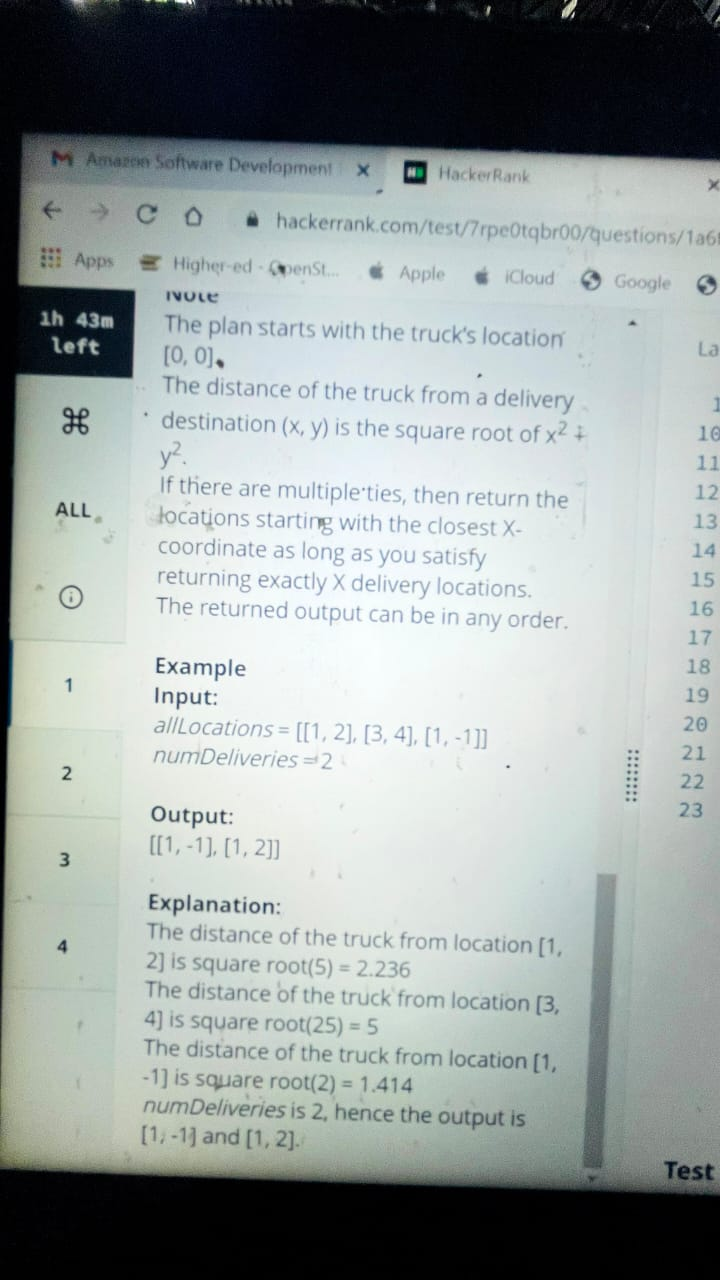

In [ ]:
edit_dist = []
allLocations_x = []
compare = []
final_index = []
def compute(allLocations,numDeliveries):
  for i in range(len(allLocations)):
    allLocations_x.append(allLocations[i][0])
  for i in range(len(allLocations)):
    x = int(((allLocations[i][0]**2) + (allLocations[i][1]**2))**0.5)
    edit_dist.append(x)
  for i in range(len(edit_dist)):
    a = edit_dist[i] - allLocations_x[i]
    compare.append(a)
    import heapq
    min = heapq.nsmallest(numDeliveries,compare)  

  #Finding the linking index
  final_index = []
  for i,j in enumerate(compare):
    for k in range(len(min)):
      if min[k] == compare[i]:
        final_index.append(i)

  #Mapping with delivery
  for m in final_index:
    print(allLocations[m])


if __name__ == "__main__":
  allLocations = [[1,2],[3,4],[1,-1]]
  numDeliveries = 2
  
  compute(allLocations,numDeliveries)


In [ ]:
def log_message(func):
    def wrap(args,*kwargs):
        res = func(args,*kwargs)
        with open('/tmp/decorator_logs.txt','wt') as f:
            f.write(res)
        return res
    return wrap

In [ ]:
file_name = "input.txt"
inputContent = uploaded[file_name].decode("utf-8")


# inputContent = '(sum + 47) / total'
fileIndex=0
EOF = "EOF"
INVALID = "INVALID"

#Character classes
LETTER = 0
DIGIT = 1
UNKNOWN = 99

#Token codes
Equal2_OP = 9 
Any_Num = 10
IDENT = 11
ADD_OP = 21
SUB_OP = 22
MULT_OP = 23
DIV_OP = 24
LEFT_PAREN = 25
RIGHT_PAREN = 26
FOR_CODE = 40
IF_CODE = 41
ELSE_CODE = 42
WHILE_CODE = 43
DO_CODE = 44
INT_CODE = 45
FLOAT_CODE = 46
SWITCH_CODE = 47

lexeme = ""
lexLen = 0

def lookupSymbol(character):
    if (character == "("):
        nextToken = LEFT_PAREN
    elif (character == ")"):
        nextToken = RIGHT_PAREN
    elif (character == "+"):
        nextToken = ADD_OP
    elif (character == "-"):
        nextToken = SUB_OP
    elif (character == "*"):
        nextToken = MULT_OP
    elif (character == "/"):
        nextToken = DIV_OP
    elif (character == "="):
      nextToken = Equal2_OP
    else:
        nextToken = INVALID
    
    return nextToken


def getChar():
    global inputContent
    global fileIndex
    if (fileIndex < len(inputContent)):
        nextChar = inputContent[fileIndex]
        fileIndex+=1
        return nextChar
    else:
        return EOF
    

def getNonBlank():
    char = getChar()
    while (char.isspace()): 
        char = getChar()
    return char

def getCharClass(char):
    if char.isalpha():
        charClass = LETTER
    elif char.isdigit():
        charClass = DIGIT
    else:
        charClass = UNKNOWN
    return charClass

def lex(char):
    lexeme = ""
    charClass = getCharClass(char)
    global fileIndex

    if (charClass == LETTER):
        lexeme+=char
        nextChar = getChar()
        while(nextChar != EOF and nextChar != " " and (getCharClass(nextChar) == LETTER or getCharClass(nextChar) == DIGIT)):
            lexeme+=nextChar
            nextChar = getChar()
        
        # Check for keywords
        if (lexeme == "if"):
            nextToken = IF_CODE
        elif (lexeme == "for"):
            nextToken = FOR_CODE
        elif (lexeme == "else"):
            nextToken = ELSE_CODE
        elif (lexeme == "while"):
            nextToken = WHILE_CODE
        elif (lexeme == "do"):
            nextToken = DO_CODE
        elif (lexeme == "int"):
            nextToken = INT_CODE
        elif (lexeme == "float"):
            nextToken = FLOAT_CODE
        elif (lexeme == "switch"):
            nextToken = SWITCH_CODE
        else:
            nextToken = IDENT

        if nextChar != " " and nextChar != EOF:
            fileIndex -= 1

    elif (charClass == DIGIT):
        lexeme+=char
        nextChar = getChar()
        while( (nextChar != EOF) and (nextChar != " ") and (getCharClass(nextChar) == DIGIT) ):
            lexeme+=nextChar
            nextChar = getChar()
        nextToken = Any_Num
        if nextChar != " " and nextChar != EOF:
            fileIndex -= 1

    elif (charClass == UNKNOWN):
        token = lookupSymbol(char)
        lexeme+=char
        nextToken = token

    print ("This token is at:", nextToken, " and the token is: ", lexeme)
    return nextToken


def main():
    nextChar = getNonBlank()
    if (nextChar == EOF):
        print ("File is empty")
        return

    while nextChar != EOF:
        nextToken = lex(nextChar)
        if (nextToken == INVALID):
            break
        nextChar = getNonBlank()

main()


In [ ]:

from prettytable import PrettyTable
import requests
# result = requests.get('https://www.gutenberg.org/cache/epub/7256/pg7256.txt')
# str = result.text
# str = result.text
str = "i am amartya1 hi! ; mtct5"
from nltk.tokenize import word_tokenize

def showTokeNs(str):
  print("Tokens",set(word_tokenize(str)))

freq = {i:word_tokenize(str).count(i) for i in word_tokenize(str)} # lambda and count()
       

Punctuation = []
punctuation = '''!@#$%^&*(){}[]|._-`/?:;"'\,~''';
for i in set(word_tokenize(str)):
  if i in punctuation:
    Punctuation.append(i)
 
array =[]
array1 = []
for i in set(word_tokenize(str)):
  if i.isdigit() == True:
    array.append(i)
    array1 = sorted(array)
  array1.sort(key=len)


Alphanumeric = []
for i in set(word_tokenize(str)):
  if i.isalpha() == False and i.isnumeric() == False and i.isalnum() == True:
    Alphanumeric.append(i)

str = "i am amartya1 hi! ; mtct5"
myTable1 = PrettyTable(["Tokens","Punctuation","Numbers","Occurences","Alphanueric"])
myTable1.add_row([set(word_tokenize(str)),Punctuation,array1,freq,Alphanumeric])
print(myTable1)
